Reg. Id: 2022BIT503

# Practical No. 6

#### Aim: To implement a Machine Learning Classification model using a Decision Tree Classifier algorithm and enhance the model by K Fold and GridSearchCV cross-validation

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [2]:
df = pd.read_csv('diabetes.csv')

In [4]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [11]:
print("Shape of dataframe=", df.shape)
df.head()

Shape of dataframe= (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [15]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [18]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [19]:
X = df.drop(['Outcome'], axis=1)
y = df['Outcome']

# Splitting dataset into training and testing

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [21]:
X_train.shape, X_test.shape

((514, 8), (254, 8))

<h2 style="color:red">printing data types for each feature X</h2>

In [22]:
X_train.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
dtype: object

In [23]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
464,10,115,98,0,0,24.0,1.022,34
223,7,142,60,33,190,28.8,0.687,61
393,4,116,72,12,87,22.1,0.463,37
766,1,126,60,0,0,30.1,0.349,47
570,3,78,70,0,0,32.5,0.270,39


<h2 style="color:red">Applying categorical encoding to dataset diabetes</h2>

In [31]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

<h2 style="color:red">Decision Tree Classifier with criterion gini</h2>

In [32]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [89]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

<h2 style="color:red">predicting gini index</h2>

In [90]:
y_pred_gini = clf_gini.predict(X_test)

In [91]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.5512


In [92]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [93]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.7023


In [95]:
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.7023
Test set score: 0.5512


[Text(0.5, 0.875, 'x[7] <= 27.5\ngini = 0.457\nsamples = 514\nvalue = [332, 182]'),
 Text(0.25, 0.625, 'x[1] <= 17.5\ngini = 0.413\nsamples = 398\nvalue = [282, 116]'),
 Text(0.125, 0.375, 'x[4] <= 64.5\ngini = 0.273\nsamples = 104\nvalue = [87, 17]'),
 Text(0.0625, 0.125, 'gini = 0.335\nsamples = 80\nvalue = [63, 17]'),
 Text(0.1875, 0.125, 'gini = 0.0\nsamples = 24\nvalue = [24, 0]'),
 Text(0.375, 0.375, 'x[6] <= 20.5\ngini = 0.447\nsamples = 294\nvalue = [195, 99]'),
 Text(0.3125, 0.125, 'gini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.4375, 0.125, 'gini = 0.436\nsamples = 286\nvalue = [194, 92]'),
 Text(0.75, 0.625, 'x[4] <= 7.5\ngini = 0.49\nsamples = 116\nvalue = [50, 66]'),
 Text(0.625, 0.375, 'x[5] <= 172.0\ngini = 0.498\nsamples = 71\nvalue = [38, 33]'),
 Text(0.5625, 0.125, 'gini = 0.499\nsamples = 62\nvalue = [30, 32]'),
 Text(0.6875, 0.125, 'gini = 0.198\nsamples = 9\nvalue = [8, 1]'),
 Text(0.875, 0.375, 'x[5] <= 75.5\ngini = 0.391\nsamples = 45\nvalue = [12, 33]'),
 

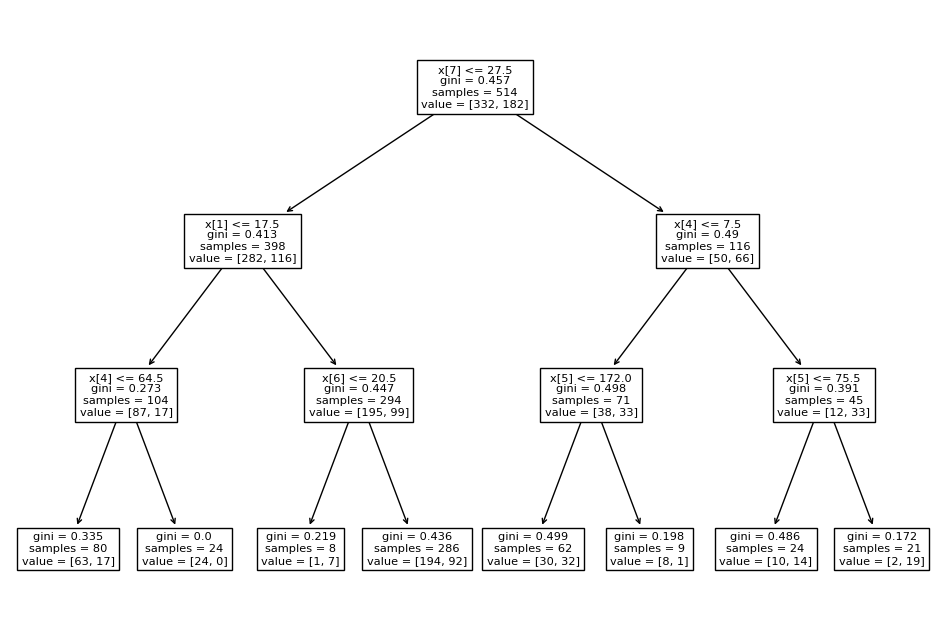

In [96]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

<h2 style="color:red">Decision Tree Classifier for criterion Entropy</h2>

In [42]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [97]:
y_pred_en = clf_en.predict(X_test)
y_pred_en

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1])

<h2 style="color:red">Score</h2>

In [98]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.5433


In [99]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [100]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.6984


<h2 style="color:red">Checking for overfitting and underfitting</h2>

In [101]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.6984
Test set score: 0.5433


[Text(0.5, 0.875, 'x[7] <= 27.5\nentropy = 0.938\nsamples = 514\nvalue = [332, 182]'),
 Text(0.25, 0.625, 'x[1] <= 17.5\nentropy = 0.871\nsamples = 398\nvalue = [282, 116]'),
 Text(0.125, 0.375, 'x[4] <= 64.5\nentropy = 0.643\nsamples = 104\nvalue = [87, 17]'),
 Text(0.0625, 0.125, 'entropy = 0.746\nsamples = 80\nvalue = [63, 17]'),
 Text(0.1875, 0.125, 'entropy = 0.0\nsamples = 24\nvalue = [24, 0]'),
 Text(0.375, 0.375, 'x[6] <= 20.5\nentropy = 0.922\nsamples = 294\nvalue = [195, 99]'),
 Text(0.3125, 0.125, 'entropy = 0.544\nsamples = 8\nvalue = [1, 7]'),
 Text(0.4375, 0.125, 'entropy = 0.906\nsamples = 286\nvalue = [194, 92]'),
 Text(0.75, 0.625, 'x[4] <= 7.5\nentropy = 0.986\nsamples = 116\nvalue = [50, 66]'),
 Text(0.625, 0.375, 'x[5] <= 194.5\nentropy = 0.996\nsamples = 71\nvalue = [38, 33]'),
 Text(0.5625, 0.125, 'entropy = 1.0\nsamples = 66\nvalue = [33, 33]'),
 Text(0.6875, 0.125, 'entropy = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.875, 0.375, 'x[5] <= 75.5\nentropy = 0.837\

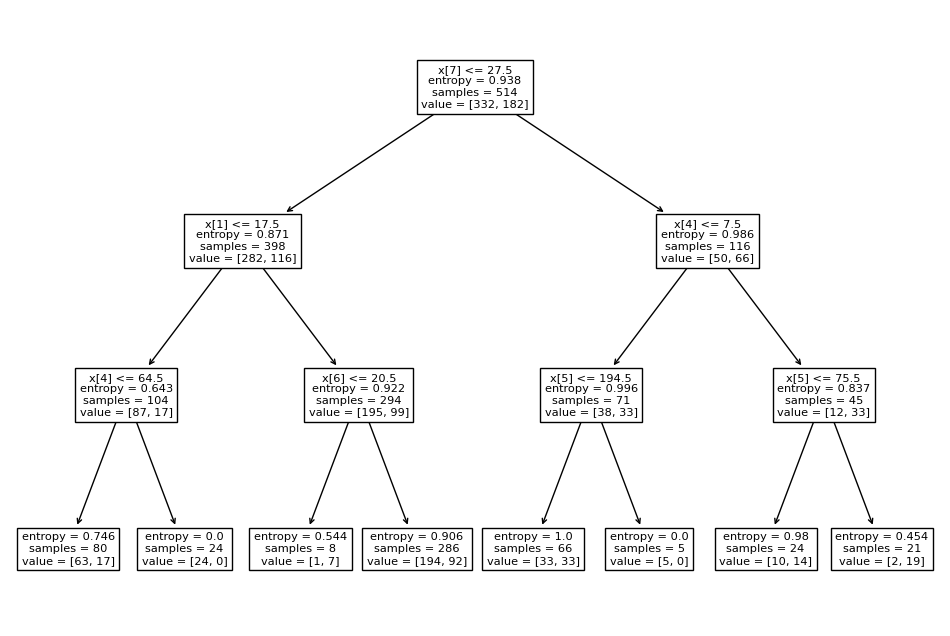

In [102]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train)) 

<h2 style="color:red">Checking for confusion matrix</h2>

In [104]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[103  65]
 [ 51  35]]


In [105]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       0.67      0.61      0.64       168
           1       0.35      0.41      0.38        86

    accuracy                           0.54       254
   macro avg       0.51      0.51      0.51       254
weighted avg       0.56      0.54      0.55       254

